In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Just another notebook to try some text vectorization while the other notebooks are going crazy

In [24]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/smartfoodscan')

In [26]:
import pandas as pd

def load(df):
    return pd.read_parquet(f'/content/drive/MyDrive/Colab Notebooks/smartfoodscan/shared_data/{df}.parquet')

X_test, X_train, y_test, y_train = load('X_test'), load('X_train'), load('y_test'), load('y_train')

In [27]:
import preprocessing as p

X_train_text, X_train_numerical = p.split_dataframe(X_train, 'text')
X_test_text, X_test_numerical = p.split_dataframe(X_test, 'text')

In [28]:
display(X_train_text.head())
display(X_train_numerical.head())
display(X_test_text.head())
display(X_test_numerical.head())

,text
133126,"Cod (cod, water, sodium tripolyphosphate [to r..."
64582,"Milk chocolate (sugar, cocoa butter, chocolate..."
201417,"Soybean oil, water, distilled vinegar, minced ..."
113150,"Olives, water, bleu cheese (pasteurized cultur..."
75357,"Cherries, water, sugar, food starch-modified (..."


,energy-kcal_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g,other_carbohydrates_100g,other_fat_100g
133126,125.0,2.34,0.0,0.020,1.56,1.6,7.81,0.422,0.031,0.00028,0.75,6.25
64582,484.0,14.52,0.0,0.016,51.61,3.2,6.45,0.097,0.129,0.00116,3.25,14.51
201417,353.0,5.88,0.0,0.000,0.00,0.0,0.00,0.794,0.000,0.00000,0.00,35.30
113150,100.0,0.00,0.0,0.000,0.00,0.0,0.00,1.700,0.200,0.00000,10.00,10.00
75357,106.0,0.00,0.0,0.000,21.18,0.0,0.00,0.012,0.000,0.00042,3.53,0.00


,text
156994,"Sugar, partially hydrogenated vegetable shorte..."
117668,"Beef bites (beef, salt, contains 2% or less of..."
47339,"Nonfat dry milk, vitamin a palmitate, vitamin d3."
111892,"Cultured milk, salt, enzymes."
90140,"Apples, high fructose corn syrup, water, ascor..."


,energy-kcal_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g,other_carbohydrates_100g,other_fat_100g
156994,424.0,4.55,6.06,0.000,57.58,0.0,0.00,0.167,0.000,0.00000,9.09,7.57
117668,319.0,10.62,0.88,0.053,4.42,1.8,13.27,0.726,0.221,0.00096,4.40,12.39
47339,348.0,0.00,0.00,0.022,52.17,0.0,34.78,0.543,1.304,0.00000,0.00,0.00
111892,429.0,25.00,0.00,0.107,0.00,0.0,25.00,0.643,0.536,0.00000,3.57,10.71
90140,71.0,0.00,0.00,0.000,15.71,1.4,0.00,0.000,0.000,0.00000,0.75,0.00


In [29]:
X_train_text, X_test_text = p.clean_text_vectorized(X_train_text, 'text'), p.clean_text_vectorized(X_test_text, 'text')

display(X_train_text.head())
display(X_test_text.head())

,text
133126,"cod , whole green beans, carrots, yellow carro..."
64582,"milk chocolate , raspberry filling ,, peanut b..."
201417,"soybean oil, water, distilled vinegar, minced ..."
113150,"olives, water, bleu cheese , sea salt, calcium..."
75357,"cherries, water, sugar, food starch-modified ,..."


,text
156994,"sugar, partially hydrogenated vegetable shorte..."
117668,"beef bites , colby cheese , apples with calciu..."
47339,"nonfat dry milk, vitamin a palmitate, vitamin d3,"
111892,"cultured milk, salt, enzymes,"
90140,"apples, high fructose corn syrup, water, ascor..."


Returning to this notebook after 9 days. Will use transformers on uncleaned text.

In [30]:
X_train

,energy-kcal_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g,text,other_carbohydrates_100g,other_fat_100g
133126,125.0,2.34,0.0,0.020,1.56,1.6,7.81,0.422000,0.031,0.00028,"Cod (cod, water, sodium tripolyphosphate [to r...",0.75,6.25
64582,484.0,14.52,0.0,0.016,51.61,3.2,6.45,0.097000,0.129,0.00116,"Milk chocolate (sugar, cocoa butter, chocolate...",3.25,14.51
201417,353.0,5.88,0.0,0.000,0.00,0.0,0.00,0.794000,0.000,0.00000,"Soybean oil, water, distilled vinegar, minced ...",0.00,35.30
113150,100.0,0.00,0.0,0.000,0.00,0.0,0.00,1.700000,0.200,0.00000,"Olives, water, bleu cheese (pasteurized cultur...",10.00,10.00
75357,106.0,0.00,0.0,0.000,21.18,0.0,0.00,0.012000,0.000,0.00042,"Cherries, water, sugar, food starch-modified (...",3.53,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128990,50.0,0.00,0.0,0.000,8.89,1.1,0.00,0.000000,0.002,0.00000,"Organic apples, ascorbic acid (to maintain col...",3.34,0.00
111787,407.0,3.70,0.0,0.000,44.40,0.0,0.00,0.018500,0.000,0.00000,"Sugars (sugar, glucose syrup [wheat]), Modifie...",44.50,1.86
141747,161.0,2.68,0.0,0.062,1.79,0.0,14.29,0.911000,0.036,0.00129,"Turkey ingredients (turkey, mechanically separ...",5.35,6.25
157940,150.0,0.00,0.0,0.000,0.00,10.0,10.00,0.000000,0.000,0.00360,Cantharellus cibarius.,10.00,0.00


Are there any outliers?

In [31]:
X_train_num = X_train.drop(columns='text')

Q1 = X_train_num.quantile(0.25)
Q3 = X_train_num.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((X_train_num < lower_bound) | (X_train_num > upper_bound)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 68246


In [32]:
# Count outliers per column
outliers_per_column = ((X_train_num < lower_bound) | (X_train_num > upper_bound)).sum()

outliers_per_column

,0
energy-kcal_100g,67
saturated-fat_100g,10469
trans-fat_100g,3815
cholesterol_100g,19880
sugars_100g,7618
fiber_100g,10593
proteins_100g,10323
sodium_100g,7427
calcium_100g,12900
iron_100g,7609


In [33]:
outliers_per_column / X_train_num.shape[0]

,0
energy-kcal_100g,0.000410
saturated-fat_100g,0.064024
trans-fat_100g,0.023331
cholesterol_100g,0.121578
sugars_100g,0.046589
fiber_100g,0.064783
proteins_100g,0.063131
sodium_100g,0.045421
calcium_100g,0.078891
iron_100g,0.046534


I think robustscaler is the right choice

In [34]:
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# Define feature columns
num_features = X_train.drop(columns=['text']).columns.tolist()  # 12 numerical features

scaler = RobustScaler()
train_num = scaler.fit_transform(X_train[num_features])
test_num = scaler.transform(X_test[num_features])

# Convert target to NumPy arrays for TensorFlow
y_train = y_train['y_train'].values
y_test = y_test['y_test'].values

In [35]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Encode text into BERT embeddings
def encode_text(texts):
    inputs = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors="tf", max_length=512)
    outputs = bert_model(inputs).last_hidden_state[:, 0, :]  # Use CLS token embedding
    return outputs.numpy()

# Convert to BERT embeddings
train_text = encode_text(X_train['text'])
test_text = encode_text(X_test['text'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ResourceExhaustedError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[163516,512,768] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(163516, 512), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(163516, 512), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

So this won't work on my laptop at home. I will try Google Colab and maybe change to bert-tiny instead.

In [41]:
import pandas as pd

def load(df):
    return pd.read_parquet(f'/content/drive/MyDrive/Colab Notebooks/smartfoodscan/shared_data/{df}.parquet')

X_test, X_train, y_test, y_train = load('X_test'), load('X_train'), load('y_test'), load('y_train')

In [42]:
X_train

,energy-kcal_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,iron_100g,text,other_carbohydrates_100g,other_fat_100g
133126,125.0,2.34,0.0,0.020,1.56,1.6,7.81,0.422000,0.031,0.00028,"Cod (cod, water, sodium tripolyphosphate [to r...",0.75,6.25
64582,484.0,14.52,0.0,0.016,51.61,3.2,6.45,0.097000,0.129,0.00116,"Milk chocolate (sugar, cocoa butter, chocolate...",3.25,14.51
201417,353.0,5.88,0.0,0.000,0.00,0.0,0.00,0.794000,0.000,0.00000,"Soybean oil, water, distilled vinegar, minced ...",0.00,35.30
113150,100.0,0.00,0.0,0.000,0.00,0.0,0.00,1.700000,0.200,0.00000,"Olives, water, bleu cheese (pasteurized cultur...",10.00,10.00
75357,106.0,0.00,0.0,0.000,21.18,0.0,0.00,0.012000,0.000,0.00042,"Cherries, water, sugar, food starch-modified (...",3.53,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128990,50.0,0.00,0.0,0.000,8.89,1.1,0.00,0.000000,0.002,0.00000,"Organic apples, ascorbic acid (to maintain col...",3.34,0.00
111787,407.0,3.70,0.0,0.000,44.40,0.0,0.00,0.018500,0.000,0.00000,"Sugars (sugar, glucose syrup [wheat]), Modifie...",44.50,1.86
141747,161.0,2.68,0.0,0.062,1.79,0.0,14.29,0.911000,0.036,0.00129,"Turkey ingredients (turkey, mechanically separ...",5.35,6.25
157940,150.0,0.00,0.0,0.000,0.00,10.0,10.00,0.000000,0.000,0.00360,Cantharellus cibarius.,10.00,0.00


In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler
import torch # More memory efficient
from transformers import DistilBertTokenizer, DistilBertModel # More memory efficient

num_features = X_train.drop(columns=['text']).columns.tolist()

scaler = RobustScaler()
train_num = scaler.fit_transform(X_train[num_features])
test_num = scaler.transform(X_test[num_features])

# Convert target to PyTorch tensors
y_train = torch.tensor(y_train['y_train'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test['y_test'].values, dtype=torch.float32).unsqueeze(1)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to precompute BERT embeddings
def encode_text(texts):
    inputs = tokenizer(texts.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt") # Reduced max_length
    with torch.no_grad():  # Disable gradient computation
        outputs = bert_model(**inputs).last_hidden_state[:, 0, :]  # CLS token
    return outputs.numpy()

# Compute and save embeddings for use later (to save time)
train_text_embeddings = encode_text(X_train['text'])
test_text_embeddings = encode_text(X_test['text'])

np.save('/content/drive/MyDrive/Colab Notebooks/smartfoodscan/train_text_embeddings.npy', train_text_embeddings)
np.save('/content/drive/MyDrive/Colab Notebooks/smartfoodscan/test_text_embeddings.npy', test_text_embeddings)

# Load
train_text = torch.tensor(np.load('/content/drive/MyDrive/Colab Notebooks/smartfoodscan/train_text_embeddings.npy'), dtype=torch.float32)
test_text = torch.tensor(np.load('/content/drive/MyDrive/Colab Notebooks/smartfoodscan/test_text_embeddings.npy'), dtype=torch.float32)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

So this still crashes even in Colab. Let's try a lighter model.

In [9]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/smartfoodscan/shared_data/df.parquet')

In [11]:
y = df['y'].values
y

array([27., 39., 41., ..., 42., 50., 60.])

In [12]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np

qt = QuantileTransformer(output_distribution="uniform")
y_transformed = qt.fit_transform(y.reshape(-1, 1)).flatten()

# Scale to 0-100 range
y_healthiness = y_transformed * 100

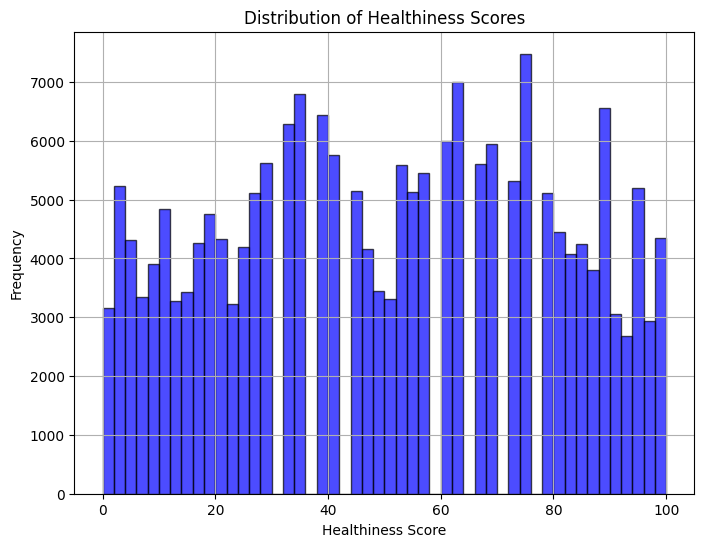

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_healthiness, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Healthiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Healthiness Scores")
plt.grid(True)

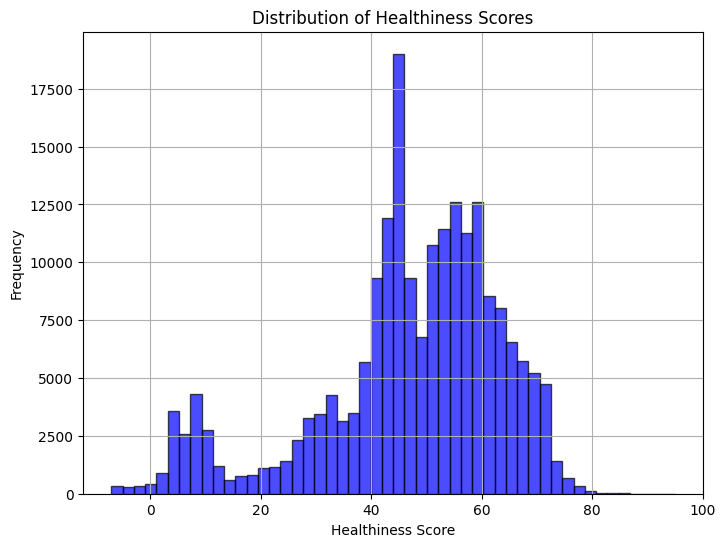

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['y'].values, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Healthiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Healthiness Scores")
plt.grid(True)

In [19]:
y_healthiness_series = pd.Series(y_healthiness)

y_healthiness_series.describe()

,0
count,204395.000000
mean,49.899188
std,28.787738
min,0.000000
25%,24.624625
50%,50.000000
75%,75.525526
max,100.000000


In [20]:
df.y.describe()

,y
count,204395.000000
mean,46.972406
std,16.885453
min,-7.000000
25%,40.000000
50%,50.000000
75%,59.000000
max,95.000000
